# CLASIFICACIÓN


In [ ]:
!pip install turicreate

In [ ]:
import pandas as pd
from sklearn import linear_model,datasets
from sklearn.utils import Bunch
import csv
import time
import math
import numpy as np
import random as rd
import turicreate as tc
import matplotlib.pyplot as plt

# Connect to GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## Timers
### De momento no hacen falta pero por si hubiera que comparar con las 
  ### implementacione de alguna libreria

class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:
    def __init__(self):
        self._start_time = None

    def start(self):
        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")
        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print("Tiempo en ejecutarse:",f"{elapsed_time:0.6f}")
        return elapsed_time


In [ ]:
#path = '/content/gdrive/MyDrive/Colab Notebooks/IAA/perceptronData.csv'
path = '/content/gdrive/MyDrive/Uni/IAA/perceptronData.csv'

df = pd.read_csv(path)

x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

df.head()

,x1,x2,y
0,1,0,0
1,0,2,0
2,1,1,0
3,1,2,0
4,1,3,1


### Perceptron

1- Codifica una función que aplique el algoritmo de aprendizaje del perceptrón,
siguiendo las directrices que se explicaron en clase.

2- Desarrolla un programa principal que haga uso de estas dos funciones, y que las
aplique sobre el siguiente conjunto de datos:

In [ ]:
def step(x):
  if x > 0:
    return 1
  else:
    return 0
  
def perceptron(x, y, weights, bias, lr, epochs):
  listaError = []

  for n in range(epochs):
      i = rd.randint(0,len(x)-1)
      point = x[i]
      pointR = y[i]

      expression = point.dot(weights) + bias
      yEst = step(expression)
      loss = pointR - yEst
      weights = weights + lr * loss * point
      bias = bias + lr * loss

  return weights, bias

if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.05
    ## Fija las epocas
    epochs = 20000

    weights = np.zeros(x.shape[1])
    for n in weights:
      n = rd.randint(0,100)/100
    bias = rd.randint(0,100)/100

    weights,bias = perceptron(x,y,weights,bias,lr,epochs)
    print("Pesos modelo",weights,"Sesgo",bias)   


Pesos modelo [0.05 0.05] Sesgo -0.17


### Clasificador logístico

3- Codifica ahora una función que aplique el algoritmo de clasificación de regresión
logística, siguiendo también las directrices vistas en clase, y aplícalo al mismo conjunto
de datos (umbral 0.5 para clasificación).

Pesos modelo [2.26953638 1.69797469] Sesgo -5.53710839767247 logLoss 0.009352328492477266


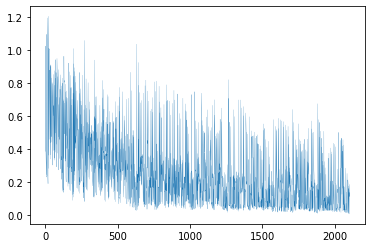

In [ ]:
def sigmoide(x):
  return 1 / (1 + math.exp(-x))
  
def logLoss(y,yEst):
  return -y * np.log(yEst) - (1-y) * np.log(1-yEst)

def clasificadorLog(x, y, weights, bias, lr, epochs,maxError):
  logloss = 100
  listaError = []

  for n in range(epochs):
      i = rd.randint(0,len(x)-1)
      point = x[i]
      pointR = y[i]

      expression = point.dot(weights) + bias
      yEst = sigmoide(expression)
      loss = pointR - yEst
      weights = weights + lr * loss * point
      bias = bias + lr * loss

      yEst = sigmoide( point.dot(weights) + bias)
      logloss = logLoss(pointR,yEst) 
    
      listaError.append(logloss)

      if logloss < maxError:
        break
  return weights, bias, listaError

if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.05
    ## Fija las epocas
    epochs = 20000
    ## Umbral de error permitido
    maxError = 0.01
    logloss = 10

    weights = np.zeros(x.shape[1])
    for n in weights:
      n = rd.randint(0,100)/100
    bias = rd.randint(0,100)/100

    weights,bias,listaError = clasificadorLog(x,y,weights,bias,lr,epochs,maxError)
    logloss = listaError[-1]
    print("Pesos modelo",weights,"Sesgo",bias,"logLoss", logloss)   
    plt.plot(listaError,linewidth=0.2)


### Matriz de confusión y funciones derivadas

4- Construye un conjunto de funciones que reciban dos vectores (y, ^y) y que construyan
la matriz de confusión para este conjunto de resultados. Construye ahora un conjunto
de funciones que reciben esta matriz de confusión (en el formato que hayas definido) y calculen las métricas de calidad que hemos estudiado en clase: exactitud, recall,
precisión, F1 y Fb, selectividad y especificidad.

In [ ]:
def matConfusion(y,yEst):
  matrizConfusion = np.array([[0,0],[0,0]])
  for n in range(len(y)):
    if y[n] == 0:
      if yEst[n] == 0:
        matrizConfusion[1][1] += 1 #True negative
      else:
        matrizConfusion[1][0] += 1 #False positive
    else:
      if yEst[n] == 0:
        matrizConfusion[0][1] += 1 #False negative
      else:
        matrizConfusion[0][0] += 1 #True positive
  return matrizConfusion


def exactitud(matConf):
  tn = matConf[1][1]
  tp = matConf[0][0]
  total = np.sum(matConf)
  return ((tp + tn) / total)

def recall(matConf):
  tp = matConf[0][0]
  fn = matConf[0][1]
  return tp / (tp + fn)

def precision(matConf):
  tp = matConf[0][0]
  fp = matConf[1][0]
  return tp / (tp + fp)

def fMedida(matConf):
  p = precision(matConf)
  r = recall(matConf)
  return (2 * p * r) / (p + r)

def fBeta(matConf,beta):
  p = precision(matConf)
  r = recall(matConf)
  return ((1 + (beta**2)) * p * r) / ((beta**2) * p + r )

def sensibilidad(matConf):
  tp = matConf[0][0]
  fn = matConf[0][1]
  return tp / (tp + fn)

def especificidad(matConf):
  tn = matConf[1][1]
  fp = matConf[1][0]
  return tn / (tn + fp)

def predictPercep(weights, bias, x):
  yEst = []
  for n in x:
    yEst.append(step(n.dot(weights) + bias))
  return yEst

def predictLog(weights, bias, x):
  yEst = []
  for n in x:
    x = sigmoide(n.dot(weights) + bias)
    if x > 0.5:
      yEst.append(1)
    else:
      yEst.append(0)
  return yEst


### Resultados de calidad del modelo (Perceptrón)

5- Con las funciones desarrolladas en el apartado 4, obtén los resultados de calidad de los clasificadores desarrollados (perceptrón y logística). 

In [ ]:
if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.05
    ## Fija las epocas
    epochs = 20000
    ## Beta para fBeta
    beta = 1

    weights = np.zeros(x.shape[1])
    for n in weights:
      n = rd.randint(0,100)/100
    bias = rd.randint(0,100)/100

    weights,bias = perceptron(x,y,weights,bias,lr,epochs)
    yEst = predictPercep(weights,bias,x)
    matConf = matConfusion(y,yEst)
    acc = exactitud(matConf)
    prec = precision(matConf)
    rec = recall(matConf)
    f1 = fMedida(matConf)
    fbeta = fBeta(matConf,beta)
    sens = sensibilidad(matConf)
    esp = especificidad(matConf)

    print("----------------------------------")
    print("Datos con clasificador Logistico")
    print("----------------------------------")
    print(matConf)
    print("Exactitud:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F medida:", f1)
    print("F beta con beta",beta,":", fbeta)
    print("Sensibilidad:", sens)
    print("Especificidad:", esp)

----------------------------------
Datos con clasificador Logistico
----------------------------------
[[4 0]
 [0 4]]
Exactitud: 1.0
Precision: 1.0
Recall: 1.0
F medida: 1.0
F beta con beta 1 : 1.0
Sensibilidad: 1.0
Especificidad: 1.0


### Resultados de calidad del modelo (Clasificador logístico)

In [ ]:
if __name__ == "__main__":
    ## Fija el learning rate
    lr = 0.05
    ## Fija las epocas
    epochs = 20000
    ## Umbral de error permitido
    maxError = 0.01
    logloss = 10
    ## Beta para fBeta
    beta = 1

    weights = np.zeros(x.shape[1])
    for n in weights:
      n = rd.randint(0,100)/100
    bias = rd.randint(0,100)/100

    weights,bias,listaError = clasificadorLog(x,y,weights,bias,lr,epochs,maxError)
    yEst = predictLog(weights,bias,x)
    matConf = matConfusion(y,yEst)
    acc = exactitud(matConf)
    prec = precision(matConf)
    rec = recall(matConf)
    f1 = fMedida(matConf)
    fbeta = fBeta(matConf,beta)
    sens = sensibilidad(matConf)
    esp = especificidad(matConf)

    print("----------------------------------")
    print("Datos con clasificador Logistico")
    print("----------------------------------")
    print(matConf)
    print("Exactitud:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F medida:", f1)
    print("F beta con beta",beta,":", fbeta)
    print("Sensibilidad:", sens)
    print("Especificidad:", esp)


----------------------------------
Datos con clasificador Logistico
----------------------------------
[[4 0]
 [1 3]]
Exactitud: 0.875
Precision: 0.8
Recall: 1.0
F medida: 0.888888888888889
F beta con beta 1 : 0.888888888888889
Sensibilidad: 1.0
Especificidad: 0.75


# TuriCreate

6- A continuación, vamos a trabajar con un ejemplo de análisis de sentimientos real. Se trata de determinar si la evaluación que se hace de una película es positiva o negativa.
Los datos se tomarán de un conjunto de 50.000 revisiones, tomadas de la base de datos IMDB3. Para construir el clasificador, no utilizarás tu propia implementación, sino que utilizarás la que está disponible en Turi Create.

CONSEJOS
a) En primer lugar, crearás un SFrame que contendrá el fichero completo

b) Posteriormente, tendrás que conocer la frecuencia de cada una de las palabras que aparecen en las críticas. El módulo text_analytics de Turi Create proporciona funcionalidad para hacer este cálculo (específicamente, la función count_words). Consulta la documentación para ver cómo obtener esta cuenta y cómo añadir el resultado a tu SFrame.

c) Una vez dispongas de los datos de entrada y salida, construirás el clasificador utilizando la función logistic_classifier. Consulta la documentación para conocer su funcionamiento.



In [ ]:
#path2 = '/content/gdrive/MyDrive/Colab Notebooks/IAA/IMDB_Dataset.csv'
path2 = '/content/gdrive/MyDrive/Uni/IAA/IMDB_Dataset.csv'
sf = tc.SFrame(data=path2)

Read 100 lines. Lines per second: 75.1682

Finished parsing file /content/gdrive/MyDrive/Uni/IAA/IMDB_Dataset.csv

Parsing completed. Parsed 100 lines in 1.34029 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /content/gdrive/MyDrive/Uni/IAA/IMDB_Dataset.csv

Parsing completed. Parsed 50000 lines in 1.33112 secs.

In [ ]:
sf['word_count'] = tc.text_analytics.count_words(sf['review'])
print(sf)

+-------------------------------+-----------+-------------------------------+
|             review            | sentiment |           word_count          |
+-------------------------------+-----------+-------------------------------+
| One of the other reviewers... |  positive | {'darker': 1.0, 'touch': 1... |
| A wonderful little product... |  positive | {'done': 1.0, 'surface': 1... |
| I thought this was a wonde... |  positive | {'go': 1.0, 'superman': 1.... |
| Basically there's a family... |  negative | {'them': 1.0, 'ignore': 1.... |
| Petter Mattei's "Love in t... |  positive | {'work': 1.0, 'for': 1.0, ... |
| Probably my all-time favor... |  positive | {'for': 1.0, 'dozen': 1.0,... |
| I sure would like to see a... |  positive | {'do': 1.0, 'go': 1.0, 'mu... |
| This show was an amazing, ... |  negative | {'awful': 1.0, 'just': 1.0... |
| Encouraged by the positive... |  negative | {'effort': 1.0, 'an': 1.0,... |
| If you like original gut w... |  positive | {'camp': 1.0, 'gre

In [ ]:
from collections import defaultdict
diccionario = defaultdict(int)
for x in sf["word_count"]:
  for y in x:
    diccionario[y]+=1

In [ ]:
frequencies=[]
for x in sf["word_count"]:
  y=x
  for t in y:
    y[t]=y[t]/diccionario[t]
  frequencies.append(y)
sf["frequencies"]=frequencies

print(sf)

+-------------------------------+-----------+-------------------------------+
|             review            | sentiment |           word_count          |
+-------------------------------+-----------+-------------------------------+
| One of the other reviewers... |  positive | {'darker': 1.0, 'touch': 1... |
| A wonderful little product... |  positive | {'done': 1.0, 'surface': 1... |
| I thought this was a wonde... |  positive | {'go': 1.0, 'superman': 1.... |
| Basically there's a family... |  negative | {'them': 1.0, 'ignore': 1.... |
| Petter Mattei's "Love in t... |  positive | {'work': 1.0, 'for': 1.0, ... |
| Probably my all-time favor... |  positive | {'for': 1.0, 'dozen': 1.0,... |
| I sure would like to see a... |  positive | {'do': 1.0, 'go': 1.0, 'mu... |
| This show was an amazing, ... |  negative | {'awful': 1.0, 'just': 1.0... |
| Encouraged by the positive... |  negative | {'effort': 1.0, 'an': 1.0,... |
| If you like original gut w... |  positive | {'camp': 1.0, 'gre

### Evaluacion modelo

7- A continuación, evaluarás el modelo que has obtenido en el apartado 6. Puedes
consultar la documentación de la función model para ver cómo hacerlo con Turi Create, aunque puedes desarrollar tu propio código aplicando el modelo que has obtenido en 6 sobre el conjunto de datos. Una vez obtenidas todas las predicciones, puedes obtener la matriz de confusión y las métricas que has desarrollado en el apartado 4.

Con funciones de Turi Create

In [ ]:
train_data,test_data = sf.random_split(.8,seed=0)
model = tc.logistic_classifier.create(train_data, target='sentiment', features=['frequencies'], validation_set=test_data)
results = model.evaluate(test_data)
print(results)

Logistic regression:

--------------------------------------------------------

Number of examples          : 40032

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 94562

Number of coefficients      : 94563

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.702194     | 0.923062          | 0.855939            |

| 1         | 4        | 1.000000  | 1.715645     | 0.970549          | 0.877508            |

| 2         | 5        | 1.000000  | 2.413924     | 0.976719          | 0.884932            |

| 3         | 7        | 0.815093  | 3.414616     | 0.984787          | 0.894462            |

| 4         | 9        | 0.815093  | 4.418364     | 0.990558          | 0.895967            |

| 9         | 14       | 1.000000  | 7.839494     | 0.999375          | 0.870787            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

{'accuracy': 0.8707865168539326, 'auc': 0.9264920109376552, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   negative   |     positive    |  620  |
|   positive   |     positive    |  4280 |
|   positive   |     negative    |  668  |
|   negative   |     negative    |  4400 |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.8692120227457352, 'log_loss': 0.5595865604131787, 'precision': 0.8734693877551021, 'recall': 0.8649959579628133, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 1001

Data:
+-----------+---------------------+--------------------+------+------+
| threshold |         fpr         |        tpr         |  p   |  n   |
+-----------+---------------------+--------------------+------+------+
|    0.0    |         1.0         |        1

Métricas utilizando funciones propias


In [ ]:
#print(test_data)
ys = test_data['sentiment']
yEsts = model.predict(test_data)

y = []
yEst = []

for x in ys:
  if x == 'positive':
    y.append(1)
  else:
    y.append(0)

for x in yEsts:
  if x == 'positive':
    yEst.append(1)
  else:
    yEst.append(0)


#print(y)
#print(yEst)
#print(len(y))
#print(len(yEst))

matConf = matConfusion(y,yEst)
acc = exactitud(matConf)
prec = precision(matConf)
rec = recall(matConf)
f1 = fMedida(matConf)
fbeta = fBeta(matConf,beta)
sens = sensibilidad(matConf)
esp = especificidad(matConf)


print("----------------------------------")
print("Datos con clasificador Logistico")
print("----------------------------------")
print(matConf)
print("Exactitud:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F medida:", f1)
print("F beta con beta",beta,":", fbeta)
print("Sensibilidad:", sens)
print("Especificidad:", esp)

----------------------------------
Datos con clasificador Logistico
----------------------------------
[[4280  668]
 [ 620 4400]]
Exactitud: 0.8707865168539326
Precision: 0.8734693877551021
Recall: 0.8649959579628133
F medida: 0.8692120227457352
F beta con beta 1 : 0.8692120227457352
Sensibilidad: 0.8649959579628133
Especificidad: 0.8764940239043825


### Curva ROC

8- Ahora vas a obtener la curva ROC para el modelo desarrollado en el apartado 6. Recuerda que has de ir modificando el umbral de clasificación y, en cada caso, obtener las predicciones, la matriz de confusión, la especificidad y la sensibilidad. Dibuja la gráfica con la curva. 

In [ ]:
print(results['roc_curve'])
tc.show(results['roc_curve']['fpr'], results['roc_curve']['tpr'])
#results['roc_curve'].print_rows(num_rows=1000, num_columns=5)

+-----------+---------------------+--------------------+------+------+
| threshold |         fpr         |        tpr         |  p   |  n   |
+-----------+---------------------+--------------------+------+------+
|    0.0    |         1.0         |        1.0         | 4948 | 5020 |
|   0.001   |  0.499800796812749  | 0.9759498787388844 | 4948 | 5020 |
|   0.002   |  0.4591633466135458 | 0.9708973322554567 | 4948 | 5020 |
|   0.003   | 0.43247011952191233 | 0.9672594987873888 | 4948 | 5020 |
|   0.004   |  0.4127490039840637 | 0.9648342764753436 | 4948 | 5020 |
|   0.005   | 0.39800796812749006 | 0.9630153597413096 | 4948 | 5020 |
|   0.006   | 0.38685258964143426 | 0.9620048504446241 | 4948 | 5020 |
|   0.007   |  0.3780876494023904 | 0.9601859337105901 | 4948 | 5020 |
|   0.008   |  0.3715139442231076 | 0.9581649151172191 | 4948 | 5020 |
|   0.009   | 0.36254980079681276 | 0.957962813257882  | 4948 | 5020 |
+-----------+---------------------+--------------------+------+------+
[1001 

Materializing X axis SArray

Materializing Y axis SArray

# Red neuronal






##Ejercicio 9

En esta práctica vamos a probar un modelo de red neuronal para llevar a cabo una
tarea de reconocimiento de imágenes, a saber, el reconocimiento de dígitos partir de imágenes caligráficas (dataset MNIST). El procedimiento a seguir se ha visto en la clasede teoría.

 Procederemos a realizar los siguientes pasos: 

 (a) cargar el dataset, 

 (b) redimensionarlo para que se ajuste a las entradas de la red y para que la salida sea categórica 

 (c) Definir la arquitectura de red (784:120relu:64relu:10softmax) 

 (d) compilar la red y entrenarla.

Intenta jugar con algunos de los hiperparámetros de la red para intentar mejorar la predicción. Presentarás un informe de los modelos que has probado. Para llevar a cabo esta evaluación, puede ser interesante que particiones el dataset en training y test.

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from google.colab import drive
#drive.mount('/content/gdrive')


(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


###Preprocesado de dataset y definición de NN

In [ ]:
img_height = 28
img_width = 28
num_classes = 10
input_shape = img_height * img_width

x_train_reshaped = x_train.reshape(-1,img_height * img_width)
x_test_reshaped = x_test.reshape(-1, img_height * img_width)
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

model = Sequential()

model.add(Dense(120, activation='relu', input_shape=(input_shape,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 120)               94200     
                                                                 
 dense_4 (Dense)             (None, 64)                7744      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 102,594
Trainable params: 102,594
Non-trainable params: 0
_________________________________________________________________


Entrenamiento de NN

In [ ]:
history = model.fit(x_train_reshaped, y_train_categorical, 
          epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 13s 2ms/step - loss: 1.2435 - accuracy: 0.8703
Epoch 2/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.2663 - accuracy: 0.9296
Epoch 3/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2053 - accuracy: 0.9451
Epoch 4/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.1848 - accuracy: 0.9538
Epoch 5/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.1657 - accuracy: 0.9576
Epoch 6/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1608 - accuracy: 0.9607
Epoch 7/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1459 - accuracy: 0.9643
Epoch 8/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1475 - accuracy: 0.9662
Epoch 9/10
6000/6000 [==============================] - 13s 2ms/step - loss: 0.1338 - accuracy: 0.9690
Epoch 10/10
6000/6000 [==============================] - 12s 2ms/step - l

Evaluacion

In [ ]:
performance = model.evaluate(x_test_reshaped, y_test_categorical, verbose=0)
print("Loss of test partition:", performance[0])
print("Accuracy of test partition:", performance[1])

Loss of test partition: 0.20875732600688934
Accuracy of test partition: 0.9552000164985657


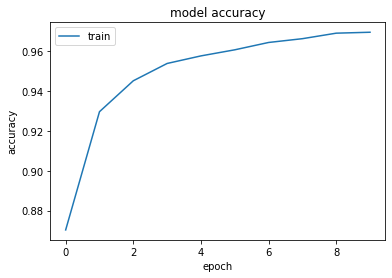

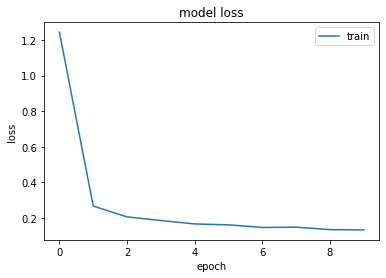

In [ ]:
import matplotlib.pyplot as plt

font = {
        'family': 'serif',
        'color' : 'black',
        'weight': 'normal',
        'size'  :  9
}

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

Modelo mejorado

###Modelo Mejorado 1

In [ ]:
model91 = tf.keras.Sequential([
        tf.keras.Input(shape=(input_shape,)),
         Dense(512, activation="relu", name="Dense0"),
        Dense(256, activation="relu", name="Dense1"),
        Dense(64, activation="relu", name="Dense2"),
        Dense(32, activation="relu", name="Dense3"),
        Dense(num_classes, activation="softmax", name="Softmax")
], name="MNIST_1")


model91.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model91.summary()

Model: "MNIST_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 512)               401920    
                                                                 
 Dense1 (Dense)              (None, 256)               131328    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 Dense3 (Dense)              (None, 32)                2080      
                                                                 
 Softmax (Dense)             (None, 10)                330       
                                                                 
Total params: 552,106
Trainable params: 552,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history91 = model91.fit(x_train_reshaped, y_train_categorical, 
          epochs=15, batch_size=25)

Epoch 1/15
2400/2400 [==============================] - 23s 9ms/step - loss: 0.6491 - accuracy: 0.8750
Epoch 2/15
2400/2400 [==============================] - 16s 7ms/step - loss: 0.1983 - accuracy: 0.9476
Epoch 3/15
2400/2400 [==============================] - 15s 6ms/step - loss: 0.1380 - accuracy: 0.9618
Epoch 4/15
2400/2400 [==============================] - 15s 6ms/step - loss: 0.1161 - accuracy: 0.9682
Epoch 5/15
2400/2400 [==============================] - 15s 6ms/step - loss: 0.0986 - accuracy: 0.9736
Epoch 6/15
2400/2400 [==============================] - 16s 6ms/step - loss: 0.0807 - accuracy: 0.9786
Epoch 7/15
2400/2400 [==============================] - 16s 7ms/step - loss: 0.0738 - accuracy: 0.9803
Epoch 8/15
2400/2400 [==============================] - 15s 6ms/step - loss: 0.0704 - accuracy: 0.9822
Epoch 9/15
2400/2400 [==============================] - 16s 7ms/step - loss: 0.0672 - accuracy: 0.9834
Epoch 10/15
2400/2400 [==============================] - 16s 6ms/step - l

In [ ]:
performance91 = model91.evaluate(x_test_reshaped, y_test_categorical, verbose=0)
print("Loss of test partition:", performance91[0])
print("Accuracy of test partition:", performance91[1])

Loss of test partition: 0.1492449790239334
Accuracy of test partition: 0.974399983882904


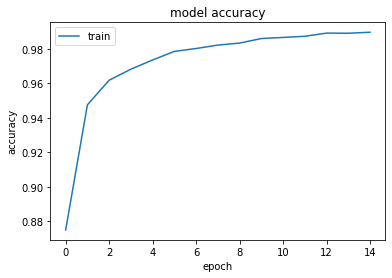

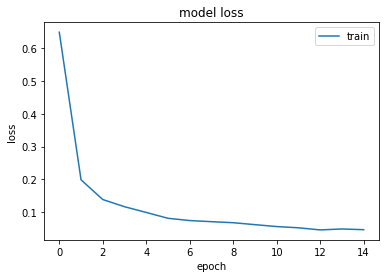

In [ ]:
# summarize history for accuracy
plt.plot(history91.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history91.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

###Modelo Mejorado 2


In [ ]:
model92 = tf.keras.Sequential([
        tf.keras.Input(shape=(input_shape,)),
        Dense(512, activation="relu", name="Dense0"),
        Dropout(0.2),
        Dense(256, activation="relu", name="Dense1"),
        Dropout(0.2),
        Dense(64, activation="relu", name="Dense2"),
        Dropout(0.2),
        Dense(32, activation="relu", name="Dense3"),
        Dense(num_classes, activation="softmax", name="Softmax")
], name="MNIST_2")


model92.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model92.summary()

history92 = model92.fit(x_train_reshaped, y_train_categorical, 
          epochs=10, batch_size=25)

Model: "MNIST_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 Dense3 (Dense)              (None, 32)                2080

Loss of test partition: 0.11791037768125534
Accuracy of test partition: 0.970300018787384


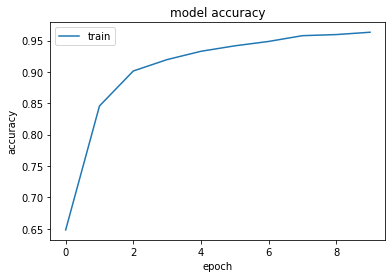

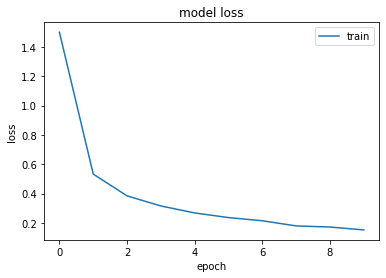

In [ ]:
performance92 = model92.evaluate(x_test_reshaped, y_test_categorical, verbose=0)
print("Loss of test partition:", performance92[0])
print("Accuracy of test partition:", performance92[1])

# summarize history for accuracy
plt.plot(history92.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history92.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

###Modelo Mejorado 3

In [ ]:
model93 = tf.keras.Sequential([
        tf.keras.Input(shape=(input_shape,)),
        Dense(25, activation="relu", name="Dense0"),
        Dropout(0.3),
        Dense(20, activation="relu", name="Dense1"),
        Dropout(0.1),
        Dense(15, activation="relu", name="Dense2"),
        Dense(12, activation="relu", name="Dense3"),
        Dropout(0.2),
        Dense(num_classes, activation="softmax", name="Softmax")
], name="MNIST_3")


model93.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model93.summary()

history93 = model93.fit(x_train_reshaped, y_train_categorical, 
          epochs=10, batch_size=25)

Model: "MNIST_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense0 (Dense)              (None, 25)                19625     
                                                                 
 dropout_6 (Dropout)         (None, 25)                0         
                                                                 
 Dense1 (Dense)              (None, 20)                520       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 Dense2 (Dense)              (None, 15)                315       
                                                                 
 Dense3 (Dense)              (None, 12)                192       
                                                                 
 dropout_8 (Dropout)         (None, 12)                0   

Loss of test partition: 0.5053853988647461
Accuracy of test partition: 0.8701000213623047


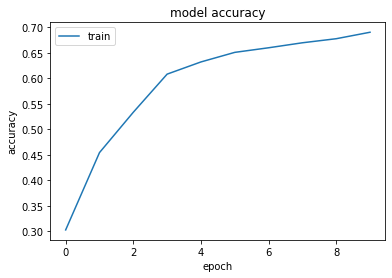

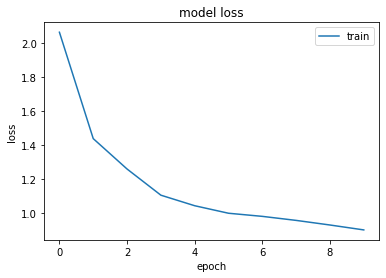

In [ ]:
performance93 = model93.evaluate(x_test_reshaped, y_test_categorical, verbose=0)
print("Loss of test partition:", performance93[0])
print("Accuracy of test partition:", performance93[1])

# summarize history for accuracy
plt.plot(history93.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history93.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

###Resultados

Vamos a comprobar la perdida y la exactitud de cada uno de los modelos, para comprobar cual de todos es el mejor obtenido.

In [ ]:
print("-------------------------------")
print("Modelo Inicial")

print("Loss of test partition:", performance[0])
print("Accuracy of test partition:", performance[1])
print("-------------------------------")

print("Modelo 1")
print("Loss of test partition:", performance91[0])
print("Accuracy of test partition:", performance91[1])
print("-------------------------------")

print("Modelo 2")
print("Loss of test partition:", performance92[0])
print("Accuracy of test partition:", performance92[1])
print("-------------------------------")

print("Modelo 3")
print("Loss of test partition:", performance93[0])
print("Accuracy of test partition:", performance93[1])
print("-------------------------------")

-------------------------------
Modelo Inicial
Loss of test partition: 0.20875732600688934
Accuracy of test partition: 0.9552000164985657
-------------------------------
Modelo 1
Loss of test partition: 0.1492449790239334
Accuracy of test partition: 0.974399983882904
-------------------------------
Modelo 2
Loss of test partition: 0.11791037768125534
Accuracy of test partition: 0.970300018787384
-------------------------------
Modelo 3
Loss of test partition: 0.5053853988647461
Accuracy of test partition: 0.8701000213623047
-------------------------------


Los resultados pueden variar con la ejecución, en este caso, la mayor exactitud nos la da el modelo 1 con un 0.9743, mientras que la menor perdida es dada por el modelo 2, con un 0.1179.
Por tanto, el modelo 2 es el mejor obtenido ya que la exactitud apenas varía con respecto al modelo 1, pero hay una menor perdida.

#Ejercicio 10


Cargar datos

In [ ]:
#path_file = '/content/gdrive/MyDrive/Colab Notebooks/IAA/Hyderabad.csv'
path_file = '/content/gdrive/MyDrive/Uni/IAA/Hyderabad.csv'
data = pd.read_csv(path_file,header=0)
x= data.drop(['Price','Location'],axis=1)
y = data['Price']
x_numpy = np.asarray(x).astype(np.float32)
y_numpy = np.asarray(y).astype(np.float32)

x_train_10, x_test_10, y_train_10, y_test_10 = train_test_split(x_numpy, y_numpy, test_size=0.25, random_state=42)


##Modelo Inicial


In [ ]:
modelP2 = tf.keras.Sequential([
        tf.keras.Input(shape=(38,)),
        Dense(128, activation="relu", name="Dense0"),
        Dropout(0.2),
        Dense(64, activation="relu", name="Dense2"),
        Dropout(0.2),
        Dense(1, name="Salida")
], name="ModeloP2")


modelP2.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
modelP2.summary()

Model: "ModeloP2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 128)               4992      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
Salida (Dense)               (None, 1)                 65        
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyP2 = modelP2.fit(x_train_10, y_train_10, 
          epochs=15, batch_size=1)

Train on 1888 samples
Epoch 1/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 138163930943596.3906 - mean_squared_error: 138163846643712.0000
Epoch 2/15
1888/1888 [==============================] - 3s 2ms/sample - loss: 40105251889566.5547 - mean_squared_error: 40105255370752.0000
Epoch 3/15
1888/1888 [==============================] - 3s 2ms/sample - loss: 34557986150873.1797 - mean_squared_error: 34557982146560.0000
Epoch 4/15
1888/1888 [==============================] - 3s 2ms/sample - loss: 35736760044293.8047 - mean_squared_error: 35736753537024.0000
Epoch 5/15
1888/1888 [==============================] - 3s 2ms/sample - loss: 35554090630251.0391 - mean_squared_error: 35554120957952.0000
Epoch 6/15
1888/1888 [==============================] - 3s 2ms/sample - loss: 35895491043707.9531 - mean_squared_error: 35895507943424.0000
Epoch 7/15
1888/1888 [==============================] - 3s 2ms/sample - loss: 34296616452667.0312 - mean_squared_error: 34296584732672.0

In [ ]:
performanceP2 = modelP2.evaluate(x_test_10, y_test_10)

print("\nLoss of test partition:", performanceP2[0])
print("MSE:", performanceP2[1])

630/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

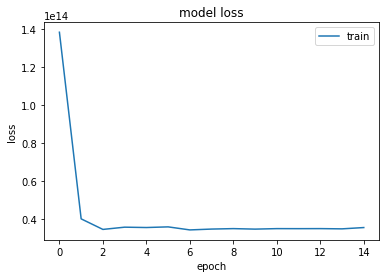

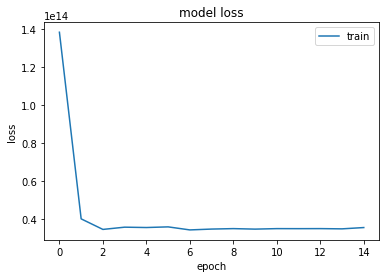

In [ ]:
# summarize history for accuracy
print(historyP2)
plt.plot(historyP2.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()


# summarize history for loss
plt.plot(historyP2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

##Modelo Mejorado 1


In [ ]:
model101 = tf.keras.Sequential([
        tf.keras.Input(shape=(38,)),
        Dense(128, activation="relu", name="Dense0"),
        Dropout(0.2),
        Dense(64, activation="relu", name="Dense1"),
        Dropout(0.2),
        Dense(32, activation="relu", name="Dense2"),
        Dropout(0.2),
        Dense(1, name="Salida")
], name="Modelo101")


model101.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
model101.summary()

Model: "Modelo101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 128)               4992      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
Dense2 (Dense)               (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
Salida (Dense)               (None, 1)                 33

In [ ]:
history101 = model101.fit(x_train_10, y_train_10, 
          epochs=15, batch_size=1)

Train on 1888 samples
Epoch 1/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 77770557643810.4219 - mean_squared_error: 77770516332544.0000
Epoch 2/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 38547788818045.3906 - mean_squared_error: 38547767689216.0000
Epoch 3/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 37505354075415.7188 - mean_squared_error: 37505369899008.0000
Epoch 4/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 36816743738640.6875 - mean_squared_error: 36816686153728.0000
Epoch 5/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 38478007216246.0469 - mean_squared_error: 38478008025088.0000
Epoch 6/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 36007471917560.6250 - mean_squared_error: 36007487471616.0000
Epoch 7/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 38115406516539.3203 - mean_squared_error: 38115410444288.000

In [ ]:
performance101 = model101.evaluate(x_test_10, y_test_10)

print("\nLoss of test partition:", performance101[0])
print("MSE:", performance101[1])

630/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

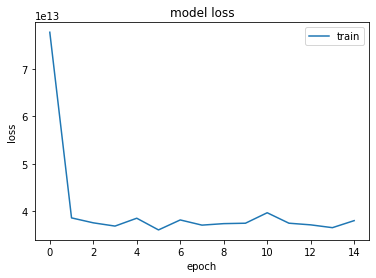

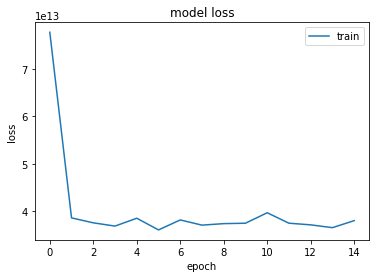

In [ ]:
# summarize history for accuracy
print(history101)
plt.plot(history101.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()


# summarize history for loss
plt.plot(history101.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

##Modelo Mejorado 2


In [ ]:
model102 = tf.keras.Sequential([
        tf.keras.Input(shape=(38,)),
        Dense(128, activation="sigmoid", name="Dense0"),
        Dropout(0.2),
        Dense(64, activation="relu", name="Dense2"),
        Dropout(0.2),
        Dense(1, name="Salida")
], name="Modelo102")


model102.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
model102.summary()

Model: "Modelo102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 128)               4992      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
Salida (Dense)               (None, 1)                 65        
Total params: 13,313
Trainable params: 13,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history102 = model102.fit(x_train_10, y_train_10, 
          epochs=15, batch_size=1)

Train on 1888 samples
Epoch 1/15
1888/1888 [==============================] - 5s 3ms/sample - loss: 179614977838618.0312 - mean_squared_error: 179615012225024.0000
Epoch 2/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 179361848658787.8125 - mean_squared_error: 179361860812800.0000
Epoch 3/15
1888/1888 [==============================] - 7s 3ms/sample - loss: 178923872682678.2500 - mean_squared_error: 178923975475200.0000
Epoch 4/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 178352126246356.5938 - mean_squared_error: 178352207953920.0000
Epoch 5/15
1888/1888 [==============================] - 5s 3ms/sample - loss: 177633885184694.2500 - mean_squared_error: 177633824342016.0000
Epoch 6/15
1888/1888 [==============================] - 5s 2ms/sample - loss: 176801046396789.1562 - mean_squared_error: 176801171111936.0000
Epoch 7/15
1888/1888 [==============================] - 3s 2ms/sample - loss: 175834159799486.9062 - mean_squared_error: 17583

In [ ]:
performance102 = model102.evaluate(x_test_10, y_test_10)

print("\nLoss of test partition:", performance102[0])
print("MSE:", performance102[1])

630/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

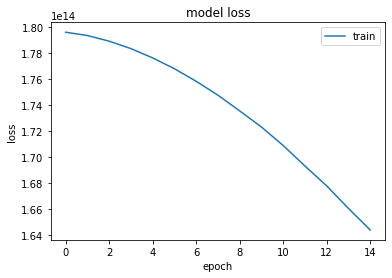

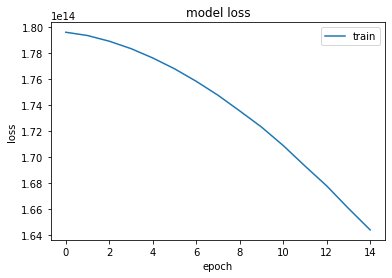

In [ ]:
# summarize history for accuracy
print(history102)
plt.plot(history102.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()


# summarize history for loss
plt.plot(history102.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

##Modelo Mejorado 3


In [ ]:
model103 = tf.keras.Sequential([
        tf.keras.Input(shape=(38,)),
        Dense(256, activation="relu", name="Dense0"),
        Dropout(0.2),
        Dense(128, activation="relu", name="Dense1"),
        Dropout(0.2),
        Dense(64, activation="relu", name="Dense2"),
        Dropout(0.2),
        Dense(1, name="Salida")
], name="Modelo103")


model103.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
model103.summary()

Model: "Modelo103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense0 (Dense)               (None, 256)               9984      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
Dense1 (Dense)               (None, 128)               32896     
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
Dense2 (Dense)               (None, 64)                8256      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
Salida (Dense)               (None, 1)                 65

In [ ]:
history103 = model103.fit(x_train_10, y_train_10, 
          epochs=15, batch_size=1)

Train on 1888 samples
Epoch 1/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 53146730095821.8984 - mean_squared_error: 53146848067584.0000
Epoch 2/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 35712439284454.2188 - mean_squared_error: 35712447545344.0000
Epoch 3/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 35962272346369.3203 - mean_squared_error: 35962260291584.0000
Epoch 4/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 35195587323264.4297 - mean_squared_error: 35195583463424.0000
Epoch 5/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 36351683887840.1641 - mean_squared_error: 36351697223680.0000
Epoch 6/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 35091470071314.3242 - mean_squared_error: 35091478740992.0000
Epoch 7/15
1888/1888 [==============================] - 4s 2ms/sample - loss: 36499478313518.3125 - mean_squared_error: 36499433193472.000

In [ ]:
performance103 = model103.evaluate(x_test_10, y_test_10)

print("\nLoss of test partition:", performance103[0])
print("MSE:", performance103[1])

630/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

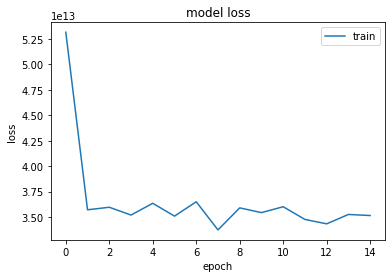

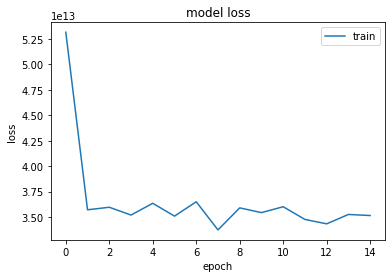

In [ ]:
# summarize history for accuracy
print(history103)
plt.plot(history103.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()


# summarize history for loss
plt.plot(history103.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='best')
plt.show()

##Resultados

Vamos a comprobar la perdida y la exactitud de cada uno de los modelos, para comprobar cual de todos es el mejor obtenido.

In [ ]:
print("-------------------------------")
print("Modelo Inicial")

print("Loss of test partition:", performanceP2[0])
print("MSE of test partition:", performanceP2[1])
print("-------------------------------")

print("Modelo 1")
print("Loss of test partition:", performance101[0])
print("MSE of test partition:", performance101[1])
print("-------------------------------")

print("Modelo 2")
print("Loss of test partition:", performance102[0])
print("MSE of test partition:", performance102[1])
print("-------------------------------")

print("Modelo 3")
print("Loss of test partition:", performance103[0])
print("MSE of test partition:", performance103[1])
print("-------------------------------")

-------------------------------
Modelo Inicial
Loss of test partition: 22961426832393.754
MSE of test partition: 22961426000000.0
-------------------------------
Modelo 1
Loss of test partition: 23479862916151.26
MSE of test partition: 23479863000000.0
-------------------------------
Modelo 2
Loss of test partition: 138804802791274.47
MSE of test partition: 138804840000000.0
-------------------------------
Modelo 3
Loss of test partition: 22740322322776.586
MSE of test partition: 22740319000000.0
-------------------------------
